### 1. Go to https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016 and download the data 

### 2. Use command line to rename the downloaded file to suicide_rates.csv, then move the file to your repository 
`use 'mv' `

### 3. Load the data into a pandas dataframe

### 4. Pick only rows where country starts with 'U' 

`use apply and lambda`

### 5. Get the names of unique countries left - `use .unique()`

##### [Thoughts]: how would that be useful if we have duplicated values in a dataset? 

### 6. Pick only rows with 'United States' (without using apply or lambda - try using indexing)

### 6. Group by age column and sum # suicides

### 7. Change the age column to a categorical one 
`use astype`

### 8. Re-order the categories so that 5-14 years appears first 

`use cat.reorder_categories`

### 9. Draw a barplot of # suicides(y) per age-group (x) for 2015

### 10. Save the plot to the visualization folder we have created

### 11. Push all to your git branch.


In [17]:
import pandas as pd
import numpy as np

suicide_data = pd.read_csv('suicide_rates.csv')

In [18]:
suicide_data.head(10)

country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   
5  Albania  1987  female    75+ years            1       35600   
6  Albania  1987  female  35-54 years            6      278800   
7  Albania  1987  female  25-34 years            4      257200   
8  Albania  1987    male  55-74 years            1      137500   
9  Albania  1987  female   5-14 years            0      311000   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   
5               2.81  Albania1987           NaN      2,156,624,900   
6               2.15  Albania1987           NaN      2,156,624,900   
7               1.56  Albania1987           NaN      2,156,624,900   
8               0.73  Albania1987           NaN      2,156,624,900   
9               0.00  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 796  G.I. Generation  
4                 796          Boomers  
5                 796  G.I. Generation  
6                 796           Silent  
7                 796          Boomers  
8                 796  G.I. Generation  
9                 796     Generation X

Lets do a bit of grouping, in particular we want to start with finding only rows where the countries start with the letter 'U'.

In [19]:
suicide_u = suicide_data.loc[suicide_data.apply(
    lambda r: r['country'].startswith('U'), axis=1), :]

In [20]:
suicide_u

country  year     sex          age  suicides_no  population  \
26068     Ukraine  1987    male    75+ years          506      654800   
26069     Ukraine  1987    male  55-74 years         1934     3652600   
26070     Ukraine  1987    male  35-54 years         3093     6206800   
26071     Ukraine  1987    male  25-34 years         1383     3890300   
26072     Ukraine  1987  female    75+ years          486     1816100   
...           ...   ...     ...          ...          ...         ...   
27815  Uzbekistan  2014  female  35-54 years          107     3620833   
27816  Uzbekistan  2014  female    75+ years            9      348465   
27817  Uzbekistan  2014    male   5-14 years           60     2762158   
27818  Uzbekistan  2014  female   5-14 years           44     2631600   
27819  Uzbekistan  2014  female  55-74 years           21     1438935   

       suicides/100k pop    country-year  HDI for year  gdp_for_year ($)   \
26068              77.28     Ukraine1987           NaN     64,087,694,038   
26069              52.95     Ukraine1987           NaN     64,087,694,038   
26070              49.83     Ukraine1987           NaN     64,087,694,038   
26071              35.55     Ukraine1987           NaN     64,087,694,038   
26072              26.76     Ukraine1987           NaN     64,087,694,038   
...                  ...             ...           ...                ...   
27815               2.96  Uzbekistan2014         0.675     63,067,077,179   
27816               2.58  Uzbekistan2014         0.675     63,067,077,179   
27817               2.17  Uzbekistan2014         0.675     63,067,077,179   
27818               1.67  Uzbekistan2014         0.675     63,067,077,179   
27819               1.46  Uzbekistan2014         0.675     63,067,077,179   

       gdp_per_capita ($)       generation  
26068                1353  G.I. Generation  
26069                1353  G.I. Generation  
26070                1353           Silent  
26071                1353          Boomers  
26072                1353  G.I. Generation  
...                   ...              ...  
27815                2309     Generation X  
27816                2309           Silent  
27817                2309     Generation Z  
27818                2309     Generation Z  
27819                2309          Boomers  

[1752 rows x 12 columns]

In [21]:
u_countries_present = suicide_u.country.unique()
u_countries_present

array(['Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States', 'Uruguay', 'Uzbekistan'], dtype=object)

Now we want to take a look at only the United States, as we want to gather some statistical information about the suicide rate here.

In [70]:
suicide_us = suicide_u.loc[suicide_u.country == 'United States', :]
suicide_us.describe()

year   suicides_no    population  suicides/100k pop  \
count   372.000000    372.000000  3.720000e+02         372.000000   
mean   2000.000000   2779.604839  2.165061e+07          13.819812   
std       8.956318   2752.716420  9.448630e+06          13.229875   
min    1985.000000     50.000000  4.064000e+06           0.260000   
25%    1992.000000    558.750000  1.818545e+07           3.972500   
50%    2000.000000   2193.000000  2.037547e+07           6.890000   
75%    2008.000000   4145.500000  2.261694e+07          23.305000   
max    2015.000000  11767.000000  4.380521e+07          58.950000   

       HDI for year  gdp_per_capita ($)  
count    120.000000          372.000000  
mean       0.891600        39269.612903  
std        0.024741        12334.117581  
min        0.841000        19693.000000  
25%        0.876000        27760.000000  
50%        0.903000        39218.000000  
75%        0.912000        51585.000000  
max        0.915000        60387.000000

In [71]:
suicide_us_gb_age = suicide_us.groupby('age')
suicide_us_gb_age.sum()['suicides_no']

age
15-24 years    141679
25-34 years    182047
35-54 years    380917
5-14 years       8923
55-74 years    224770
75+ years       95677
Name: suicides_no, dtype: int64

In [72]:
suicide_us.age = suicide_us.age.astype('category')

//anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:5209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [73]:
cats = suicide_us.age.cat.categories
cats

Index(['15-24 years', '25-34 years', '35-54 years', '5-14 years',
       '55-74 years', '75+ years'],
      dtype='object')

In [74]:
suicide_us.age.cat.reorder_categories([cats[3], cats[0], cats[1], cats[2], cats[4], cats[5]], inplace = True)

In [75]:
suicide_us_gb_age = suicide_us.groupby(['age'])
suicide_us_gb_age.sum()['suicides_no']
suicide_us.age.cat.categories

Index(['5-14 years', '15-24 years', '25-34 years', '35-54 years',
       '55-74 years', '75+ years'],
      dtype='object')

In [82]:
import seaborn as sns
sns.set()

In [83]:
data_2015 = suicide_us.loc[suicide_us.year == 2015, :]
data_2015_gb = data_2015.groupby('age').sum()
data_2015_gb.reset_index(inplace=True)

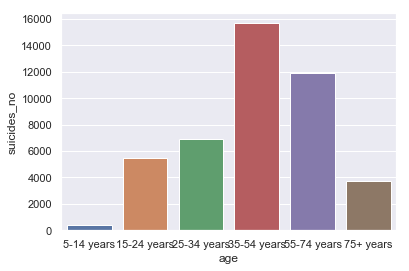

In [84]:
sns.barplot(x='age', y='suicides_no', data=data_2015_gb)